In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import librosa
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from random import shuffle
import scipy.stats as st

from pynwb import NWBHDF5IO
from pynwb.image import ImageSeries
from pynwb.epoch import TimeIntervals

In [5]:
# ----- SET UP FILE HANDLING -----

computer = 'Dorian'

match computer:
    case 'Dorian':
        nwbpath = 'M:\\scn2a-paper-GWJSNH\\NWB-files'
        
    case 'Ernest':
        nwbpath = 'C:\\Users\\nhogl\\Documents\\GitHub\\scn2a-paper-GWJSNH-code\\NWB'

assay = 'PPT'
allnwb = []
allnwb += [os.path.join(nwbpath,each) for each in os.listdir(nwbpath) if assay in each]

In [36]:
# ----- COLLATE PARTNER AND STRANGER HUDDLE DATA -----

FHet = 0
MHet = 0
FWT = 0
MWT = 0

for i,fname in enumerate(allnwb):
    # open file
    io = NWBHDF5IO(os.path.join(nwbpath,fname), mode="r") # <-- open in write to append snippets?
    nwbfile = io.read()
    
    # for sanity check, print out the name of the file being handled
    pathsplit = fname.split('\\')
    recstem = pathsplit[-1].strip('.nwb')
    print(recstem)
    
    # filter out files that don't have complete timelines
    
    # handle cases where there are no examples of the behavior
    try:
        partnerdf = nwbfile.intervals['single_behavior_Huddle Partner'].to_dataframe()
    except:
        print('No partner huddles')
        partnerdf = pd.DataFrame()
    try:
        strangerdf = nwbfile.intervals['single_behavior_Huddle Stranger'].to_dataframe()
    except:
        print('No stranger huddles')
        strangerdf = pd.DataFrame()
        
    # make new dataframe with start times, durations, and labels
    nrpartner = partnerdf.shape[0]
    masspartner = ['partner']*nrpartner
    combdf = pd.concat([partnerdf, strangerdf])    
    nrentries = combdf.shape[0]
    nrstranger = strangerdf.shape[0]
    massstranger = ['stranger']*nrstranger
    
    # get metadata information  
    pair_tag = fname.split('\\')[-1].split('_')[1] # label the pair the observation came from    
    massGT = [nwbfile.subject.genotype]*nrentries
    massPairtag = [pair_tag]*nrentries
    massSex = [nwbfile.subject.sex]*nrentries
    massLabel = masspartner+massstranger
    if np.logical_and(nwbfile.subject.genotype == 'Het', nwbfile.subject.sex=='F'): 
        massWithinGroup = [FHet]*nrentries
        FHet+=1
    elif np.logical_and(nwbfile.subject.genotype == 'WT', nwbfile.subject.sex=='F'): 
        massWithinGroup = [FWT]*nrentries
        FWT+=1
    elif np.logical_and(nwbfile.subject.genotype == 'Het', nwbfile.subject.sex=='M'):
        massWithinGroup = [MHet]*nrentries
        MHet+=1
    elif np.logical_and(nwbfile.subject.genotype == 'WT', nwbfile.subject.sex=='M'):
        massWithinGroup = [MWT]*nrentries
        MWT+=1
    nrcols = combdf.shape[1]
    
    # add columns
    combdf.insert(nrcols, 'pairtag', massPairtag, True)
    combdf.insert(nrcols+1, 'GT', massGT, True)
    combdf.insert(nrcols+2, 'sex', massSex, True)
    combdf.insert(nrcols+3, 'behavior_label', massLabel, True)
    combdf['pair'] = massWithinGroup
    
    # consolidate into one big dataframe
    if i==0:
        rundf = combdf
    else:
        rundf = pd.concat([rundf,combdf])

Nov22_Pair15_PPT
Nov22_Pair16_PPT
Nov22_Pair17_PPT
Nov22_Pair18_PPT
Nov22_Pair19_PPT
Nov22_Pair1_PPT
No stranger huddles
Nov22_Pair21_PPT
Nov22_Pair22_PPT
Nov22_Pair23_PPT
Nov22_Pair24_PPT
Nov22_Pair25_PPT
Nov22_Pair26_PPT
Nov22_Pair27_PPT
Nov22_Pair28_PPT
Nov22_Pair29_PPT
Nov22_Pair2_PPT
Nov22_Pair30_PPT
No partner huddles
Nov22_Pair31_PPT
Nov22_Pair32_PPT
Nov22_Pair33_PPT
Nov22_Pair34_PPT
Nov22_Pair35_PPT
No stranger huddles
Nov22_Pair36_PPT
Nov22_Pair37_PPT
Nov22_Pair38_PPT
Nov22_Pair3_PPT
Nov22_Pair40_PPT
Nov22_Pair41_PPT
Nov22_Pair42_PPT
Nov22_Pair43_PPT
Nov22_Pair44_PPT
Nov22_Pair46_PPT
Nov22_Pair47_PPT
Nov22_Pair48_PPT
Nov22_Pair49_PPT
Nov22_Pair4_PPT
Nov22_Pair50_PPT
Nov22_Pair51_PPT
Nov22_Pair52_PPT
No stranger huddles
Nov22_Pair56_PPT
Nov22_Pair57_PPT
Nov22_Pair58_PPT
Nov22_Pair59_PPT
Nov22_Pair5_PPT
Nov22_Pair61_PPT
No stranger huddles
Nov22_Pair62_PPT
Nov22_Pair63_PPT
No stranger huddles
Nov22_Pair64_PPT
Nov22_Pair6_PPT
Nov22_Pair7_PPT
Nov22_Pair8_PPT


KeyError: 'genotype'

In [45]:
rundf["SEXxGT"] = rundf['sex'].add(rundf['GT']) # add a column that maps the GT/sex 2x2 into 4 groups
rundf['log2(dur)'] = np.log2(rundf['duration']) # add the log2 transform of durations
zdf = rundf.duration.replace(0, 0.001)
rundf.duration = zdf
# add a label to separate pairtags in each group
# jcs = np.unique(rundf.joint_category)
# for i,jc in enumerate(jcs):
#     pts = rundf.pairtag[runtag.joint_category==jc]
#     for j,pt in enumerate(pts):
        
rundf.head()

C:\Users\Nerissa\anaconda3\envs\voc230824\lib\site-packages\pandas\core\arraylike.py:405: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,start_time,stop_time,behavior,duration,atype,pairtag,GT,sex,behavior_label,within_group,joint_category,log2_transform,SEXxGT,log2(dur)
id,,,,,,,,,,,,,,
4,14.500,52.748,Huddle Partner,38.248,STATE,Pair15,Het,F,partner,0,FHet,5.257312,FHet,5.257312
8,55.249,80.496,Huddle Partner,25.247,STATE,Pair15,Het,F,partner,0,FHet,4.658040,FHet,4.658040
11,81.496,164.749,Huddle Partner,83.253,STATE,Pair15,Het,F,partner,0,FHet,6.379430,FHet,6.379430
43,245.497,245.497,Huddle Partner,0.001,STATE,Pair15,Het,F,partner,0,FHet,-9.965784,FHet,-9.965784
66,275.962,277.462,Huddle Partner,1.500,STATE,Pair15,Het,F,partner,0,FHet,0.584963,FHet,0.584963


In [68]:
# --- Make color palettes ---
col1 = df.colors[np.logical_and(ldf.genotype=='WT',ldf.sex=='F')].reset_index(drop=True)[0]/255
col2 = ldf.colors[np.logical_and(ldf.genotype=='Het',ldf.sex=='F')].reset_index(drop=True)[0]/255
col3 = ldf.colors[np.logical_and(ldf.genotype=='WT',ldf.sex=='M')].reset_index(drop=True)[0]/255
col4 = ldf.colors[np.logical_and(ldf.genotype=='Het',ldf.sex=='M')].reset_index(drop=True)[0]/255
fcols = [col1,col2]
mcols = [col3,col4] # match colors to groups
fpal = sns.color_palette(fcols)
mpal = sns.color_palette(mcols)
acols = [col1,col2,col3,col4]
apal = sns.color_palette(acols)

NameError: name 'ldf' is not defined

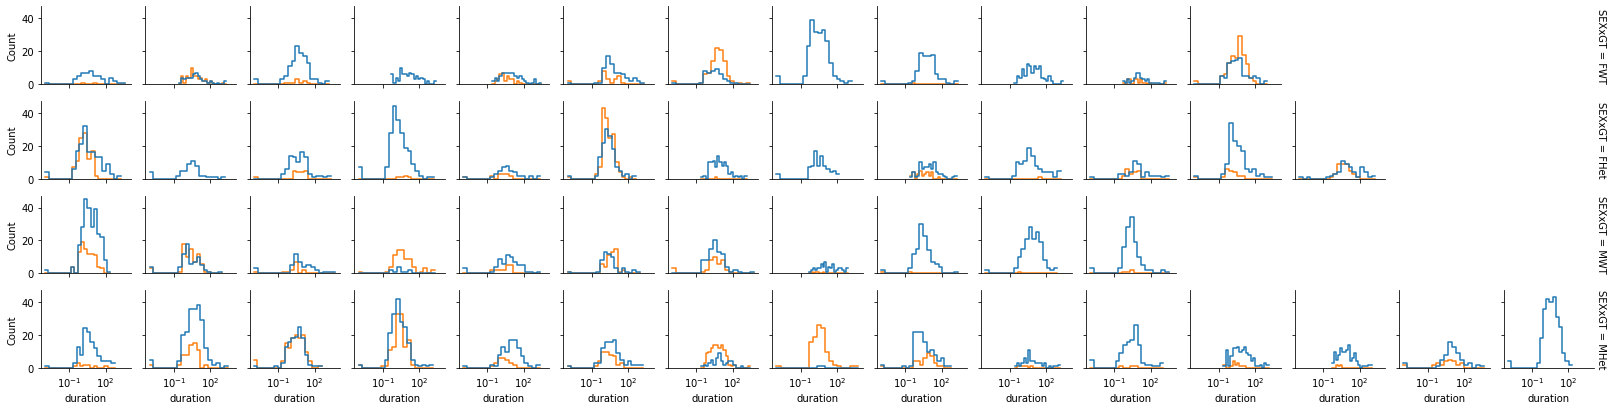

In [67]:
# ----- PLOT HISTOGRAMS FOR EACH INDIVIDUAL -----
g = sns.FacetGrid(rundf, row='SEXxGT',col='within_group',height=1.5,margin_titles=True,
                  row_order=['FWT','FHet','MWT','MHet'])
g.map_dataframe(sns.histplot, x='duration', hue='behavior_label',bins=20,element='step',fill=False,log_scale=(True, False))
for (i,j,k), data in g.facet_data(): # hide empty axes
    if data.empty:
        ax = g.facet_axis(i, j)
        ax.set_axis_off()
# g.axes[0,0].set_title('')
for ax in g.axes[0]: # turn off pointless column labels
    ax.set_title('')
# change colors